In [1]:
# Top 6 Machine Learning Models for Regression:

# Linear Regression
# Decision Tree Regression
# Random Forest Regression
# Support Vector Regression
# Ridge Regression
# K-Nearest Neighbors Regression


# Top 5 Machine Learning Models for Classification:

# Logistic Regression
# Decision Tree Classifier
# Random Forest Classifier
# Support Vector Machines (SVM)
# K-Nearest Neighbors Classifier



# Regression Models

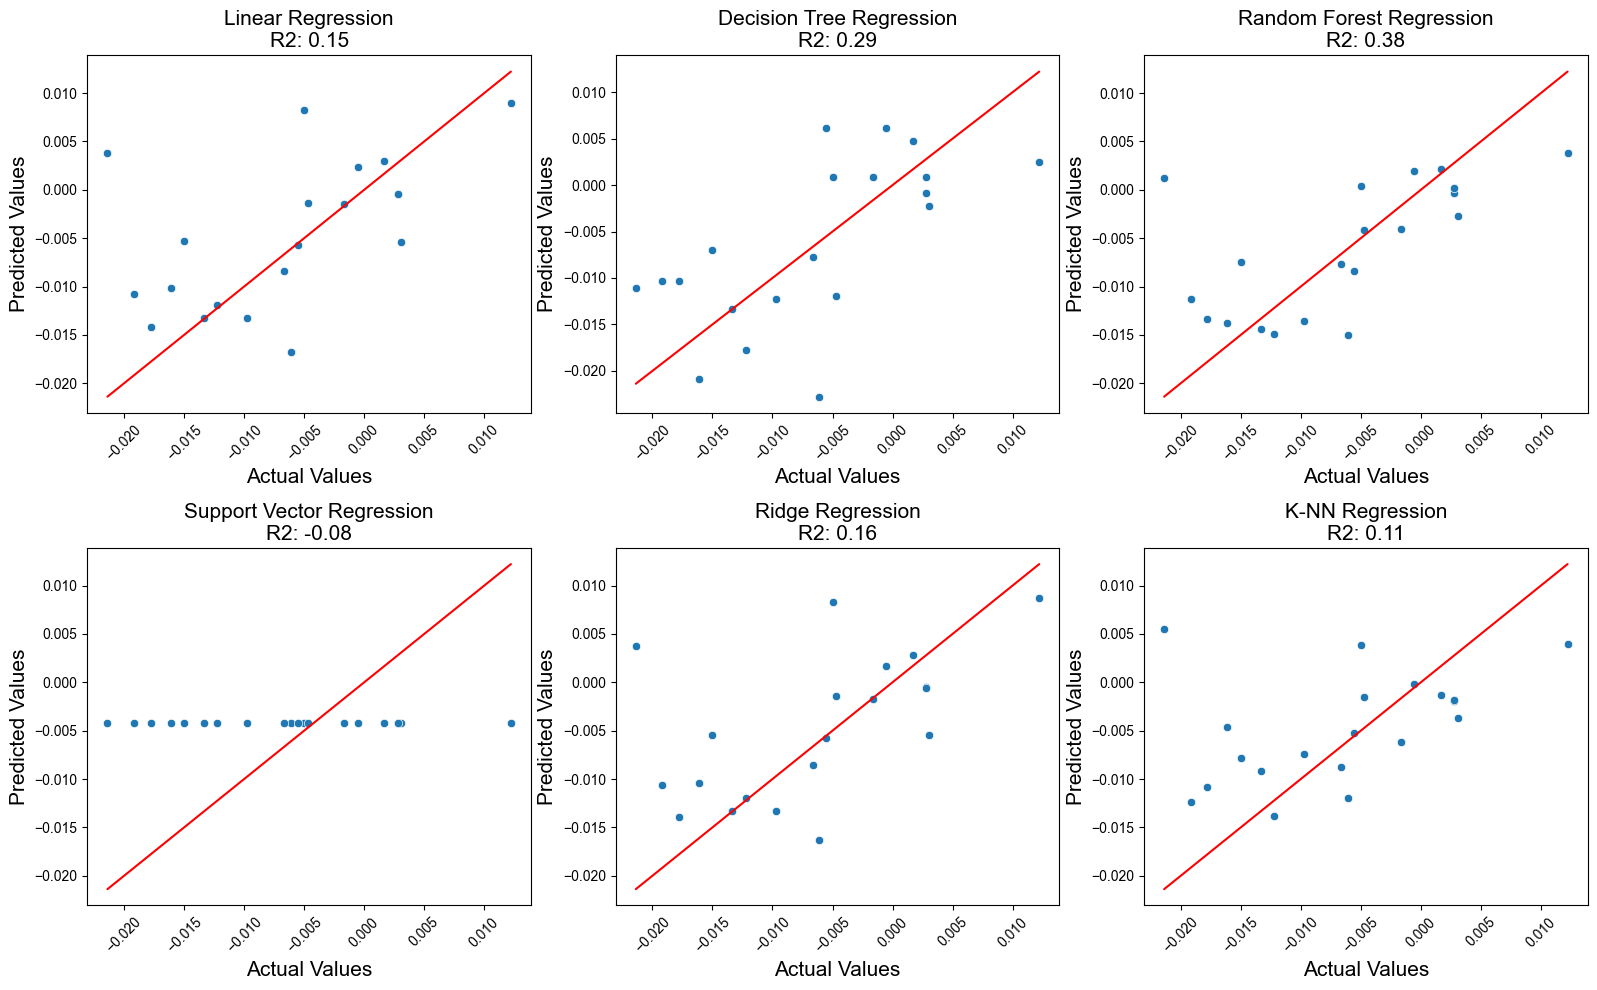

,R-squared:,Mean RMSE,Standard deviation of RMSE:,Mean Squared Error:,Mean Absolute Error:
Model name,,,,,
Linear Regression,0.151075,0.007481,0.000613,0.000064,0.005430
Decision Tree Regression,0.293885,0.009434,0.000945,0.000053,0.006139
Random Forest Regression,0.383934,0.007184,0.000832,0.000046,0.004823
Support Vector Regression,-0.080082,0.010341,0.001761,0.000082,0.007403
Ridge Regression,0.162899,0.007307,0.000518,0.000063,0.005384
K-NN Regression,0.112103,0.008157,0.001215,0.000067,0.005989


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load data into dataframe
data = pd.read_csv('C:/Users/00220401626/Desktop/必要なファイル/Regression.csv', encoding='cp932')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Angl_gosa', axis=1),  # X values (features)
    data['Angl_gosa'],              # y value (target variable)
    test_size=0.2,                        # percentage of data to use for testing
    random_state=42                       # seed for reproducibility
)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Support Vector Regression': SVR(),
    'Ridge Regression': Ridge(),
    'K-NN Regression': KNeighborsRegressor()
}

# Create a 2x3 subplot grid with increased vertical spacing
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
fig.subplots_adjust(hspace=100)

# List to store metrics for each model
model_metrics = []

# Evaluate and plot metrics for each model
for i, (name, model) in enumerate(models.items()):
    row = i // 3  # Compute the row index
    col = i % 3   # Compute the column index
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    
    # Use cross-validation to evaluate the model's performance
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    pipeline.fit(X_train, y_train)                     # Train the model on the training data
    y_pred = pipeline.predict(X_test)                  # Use the model to make predictions on the testing data
   
    rmse_scores = np.sqrt(-scores)                     # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)               
    r2 = pipeline.score(X_test, y_test)
    mae = np.mean(np.abs(y_test - y_pred))
    

    # Plot the actual and predicted values using Seaborn
    sns.set_style('darkgrid')
    sns.set_palette('deep')
    sns.scatterplot(x=y_test, y=y_pred, ax=axes[row, col])
    sns.lineplot(x=y_test, y=y_test, color='red', ax=axes[row, col])
    axes[row, col].set_title(name + '\nR2: {:.2f}'.format(r2), fontsize=15)
    axes[row, col].set_xlabel('Actual Values', fontsize=15)
    axes[row, col].set_ylabel('Predicted Values', fontsize=15)
    axes[row, col].tick_params(axis='x', labelrotation=45, labelsize=10)
    axes[row, col].tick_params(axis='y', labelsize=10)

    # Add metrics for this model to the list
    model_metrics.append({
        'Model name': name,
        'Mean RMSE': rmse_scores.mean(),
        'Standard deviation of RMSE:': rmse_scores.std(),
        'Mean Squared Error:': mse,
        'Mean Absolute Error:': mae,
        'R-squared:': r2
    })

plt.tight_layout()
plt.show()

df = pd.DataFrame(model_metrics)
df=df.reindex(columns=['Model name', 'R-squared:','Mean RMSE', 'Standard deviation of RMSE:',
       'Mean Squared Error:', 'Mean Absolute Error:' ])
df.set_index('Model name', inplace=True)
df

# Classification Models

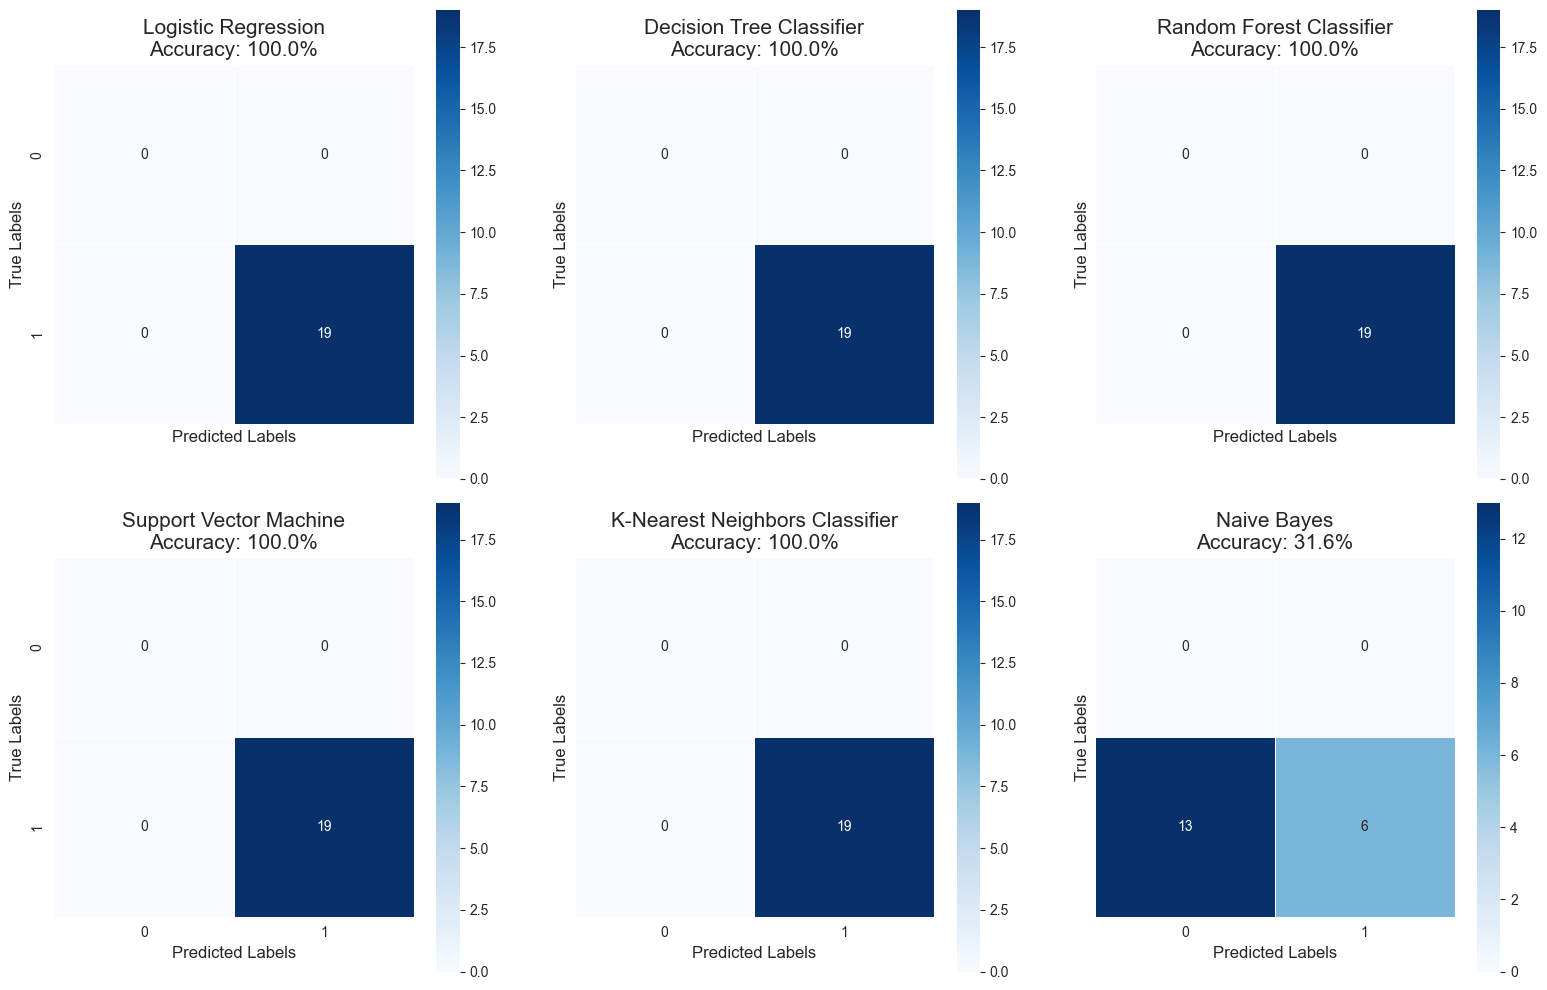

,Accuracy,Precision,Recall,F1
Model Name,,,,
Logistic Regression,100.0%,1.0,1.000000,1.00
Decision Tree Classifier,100.0%,1.0,1.000000,1.00
Random Forest Classifier,100.0%,1.0,1.000000,1.00
Support Vector Machine,100.0%,1.0,1.000000,1.00
K-Nearest Neighbors Classifier,100.0%,1.0,1.000000,1.00
Naive Bayes,31.6%,0.5,0.157895,0.24


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Load data into dataframe
data = pd.read_csv('C:/Users/00220401626/Desktop/必要なファイル/Classification.csv', encoding='cp932')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('judge', axis=1),  # X values (features)
    data['judge'],              # y value (target variable)
    test_size=0.2,                        # percentage of data to use for testing
    random_state=42                       # seed for reproducibility
)

models = [('Logistic Regression', LogisticRegression()), 
          ('Decision Tree Classifier', DecisionTreeClassifier()), 
          ('Random Forest Classifier', RandomForestClassifier()), 
          ('Support Vector Machine', SVC()), 
          ('K-Nearest Neighbors Classifier', KNeighborsClassifier()),
          ('Naive Bayes', GaussianNB())]

model_metrics = []

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10), sharex=True, sharey=True)
# fig.subplots_adjust(hspace=0.5, wspace=3)
fig.subplots_adjust(left=0.5, bottom=0.5, top=2, right=1)

for i, (name, model) in enumerate(models):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    
    # Use cross-validation to evaluate the model's performance
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    pipeline.fit(X_train, y_train)                  
    y_pred = pipeline.predict(X_test)                 
    
    accuracy = accuracy_score(y_test, y_pred)*100          # Calculate evaluation metrics
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
    
    
    # Plot the confusion matrix using Seaborn
    sns.set_style('white')
    sns.set_palette('pastel')
    sns.heatmap(cm, annot=True, cmap='Blues', square=True, linewidths=0.5, ax=axes.flatten()[i])
    axes.flatten()[i].set_title(name + '\nAccuracy: {:.1f}%'.format(accuracy), fontsize=15)
    axes.flatten()[i].set_xlabel('Predicted Labels', fontsize=12)
    axes.flatten()[i].set_ylabel('True Labels', fontsize=12)
    
    # Add metrics for this model to the list
    model_metrics.append({
        'Model Name': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    })

plt.tight_layout()
plt.show()

# Create a DataFrame from the model_metrics list
df = pd.DataFrame(model_metrics)

# Set the 'name' column as the index
df.set_index('Model Name', inplace=True)
df['Accuracy'] = df['Accuracy'].apply(lambda x: '{:.1f}%'.format(x))
df